In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, applications, preprocessing
import matplotlib.pyplot as plt


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
os.listdir("/kaggle/input/diabetic-retinopathy-224x224-2019-data")

['colored_images', 'train.csv']

In [3]:
from matplotlib import image
from PIL import Image

In [4]:
im = image.imread('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/04ac765f91a1.png')
im.shape

(224, 224, 3)

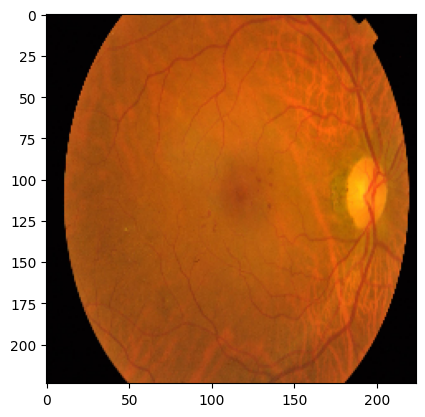

In [5]:
plt.imshow(im)

In [6]:
im = image.imread('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Moderate/025a169a0bb0.png')
im.shape

(224, 224, 3)

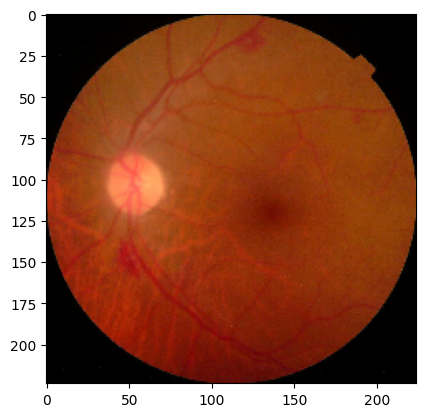

In [7]:
plt.imshow(im)

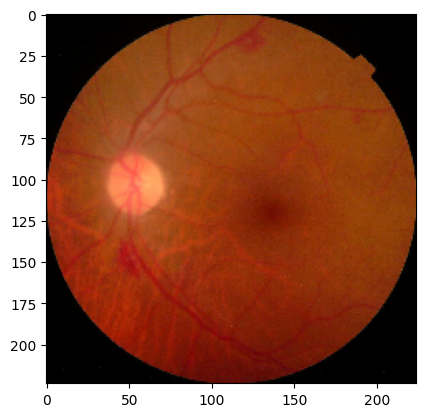

In [8]:
plt.imshow(im)

In [9]:
im = image.imread('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Proliferate_DR/080ee76c958c.png')
im.shape

(224, 224, 3)

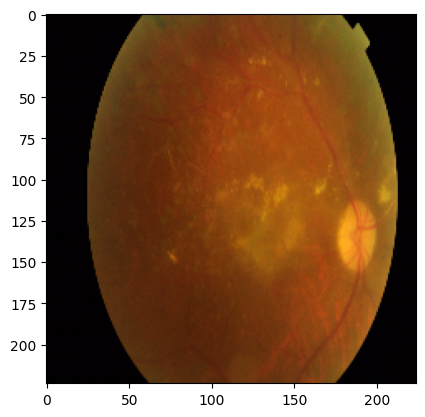

In [10]:
plt.imshow(im)

In [11]:
im = image.imread('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/Severe/0f96c358a250.png')
im.shape

(224, 224, 3)

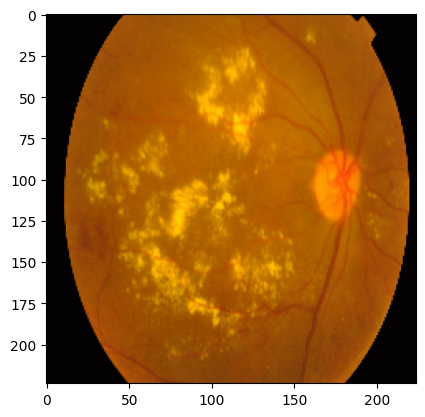

In [12]:
plt.imshow(im)

In [13]:
from PIL import Image
def Load_Images(path):
    folders = os.listdir(path)
    data = []
    label = []
    for i in folders:
        c = 0
        images = os.listdir(path + '/' + i)
        for j in images:
            if c <= 1000:
                im = Image.open(path + '/' + i + '/' + j)
                ar = np.array(im) 
                data.append(ar)
                label.append(i)
                c = c + 1 
    return np.array(data), label

In [14]:
x, y = Load_Images('/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images/')
x.shape, len(y)

((2858, 224, 224, 3), 2858)

In [15]:
target = pd.Series(y, dtype = 'category')
target

0         Mild
1         Mild
2         Mild
3         Mild
4         Mild
         ...  
2853    Severe
2854    Severe
2855    Severe
2856    Severe
2857    Severe
Length: 2858, dtype: category
Categories (5, object): ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

<Axes: >

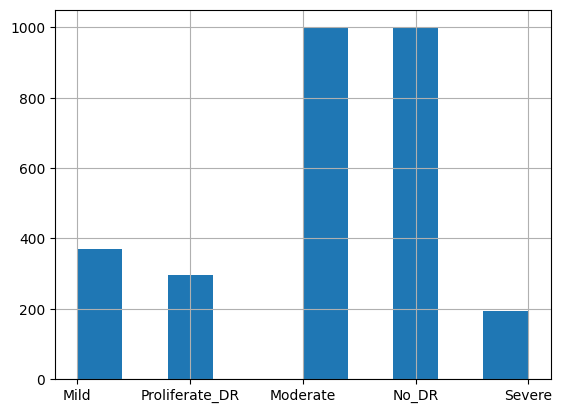

In [16]:
target.hist()

In [17]:
target.value_counts()

No_DR             1001
Moderate           999
Mild               370
Proliferate_DR     295
Severe             193
Name: count, dtype: int64

In [18]:
t = target.cat.codes
t

0       0
1       0
2       0
3       0
4       0
       ..
2853    4
2854    4
2855    4
2856    4
2857    4
Length: 2858, dtype: int8

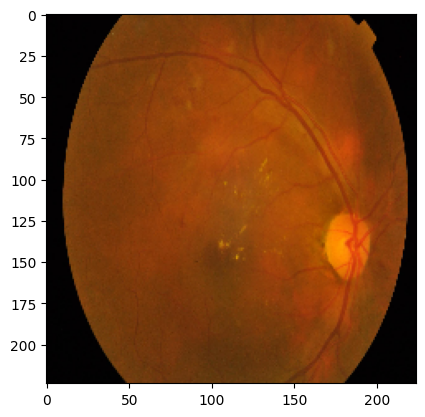

In [19]:
plt.imshow(x[0])

In [20]:
for i in range(len(x)):
    # Convert the image to LAB color space
    lab = cv2.cvtColor(x[i], cv2.COLOR_RGB2LAB)

    # Split the LAB image into L, A, and B channels
    l, a, b = cv2.split(lab)

    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    # Merge the CLAHE-enhanced L channel with the original A and B channels
    limg = cv2.merge((cl, a, b))

    # Convert the LAB image back to RGB color space
    x[i] = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

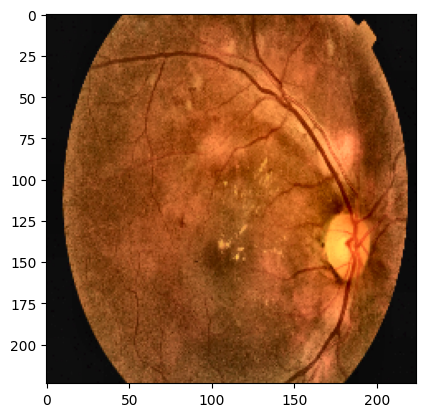

In [21]:
plt.imshow(x[0])

In [22]:
def match_histograms(image, reference):
    # Convert the images to LAB color space
    image_lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    reference_lab = cv2.cvtColor(reference, cv2.COLOR_RGB2LAB)

    # Split the LAB images into channels
    l, a, b = cv2.split(image_lab)
    l_ref, a_ref, b_ref = cv2.split(reference_lab)

    # Apply histogram matching on the L channel
    l_matched = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)).apply(l)

    # Merge the matched L channel with the original A and B channels
    matched_lab = cv2.merge((l_matched, a, b))

    # Convert the LAB image back to RGB color space
    matched_rgb = cv2.cvtColor(matched_lab, cv2.COLOR_LAB2RGB)

    return matched_rgb

# Assuming x is your image array
# Reference image for histogram matching (you can choose any image from your dataset)
reference_image = x[72]

# Loop through each image in the array
for i in range(len(x)):
    x[i] = match_histograms(x[i], reference_image)

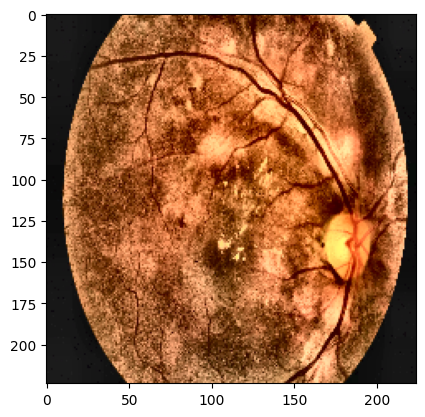

In [23]:
plt.imshow(x[0])

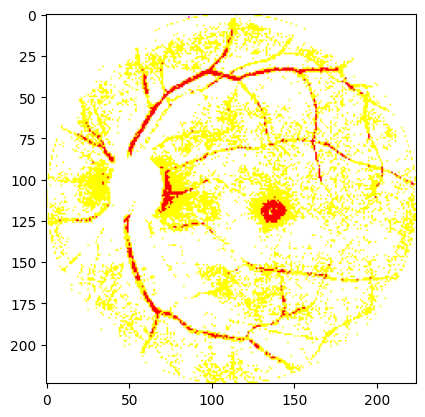

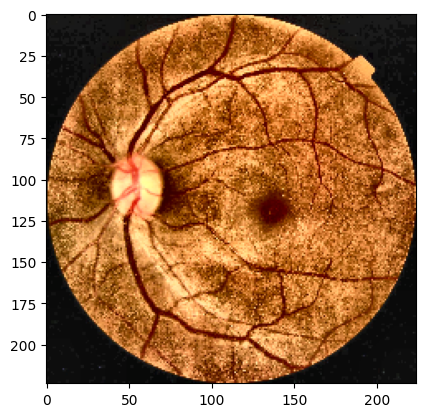

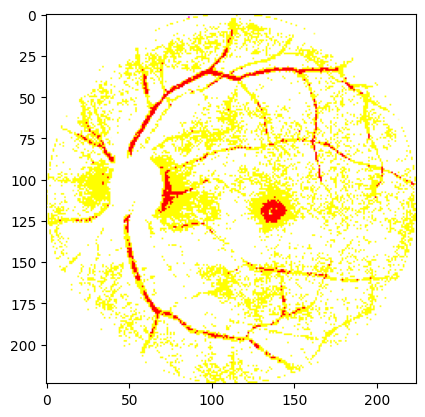

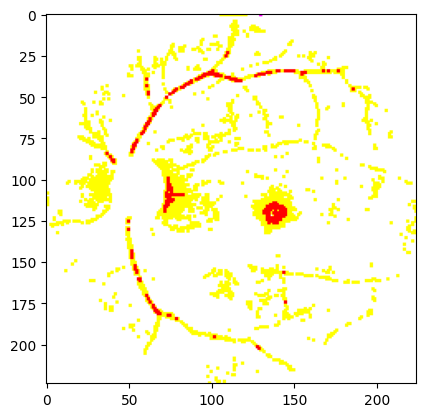

(224, 224, 3)


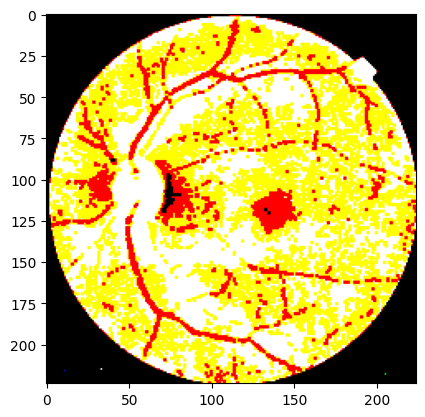

In [24]:
clahe_output = np.power(x[2600] / 255.0, 1) * 255
plt.imshow(clahe_output)
plt.show()
plt.imshow(x[2600])
kernel = np.array([[0, -0.01, 0],
                       [-0.01, 3, -0.01],
                       [0, -0.01, 0]])

plt.show()
sharpened_image = cv2.filter2D(clahe_output, -1, kernel)
plt.imshow(sharpened_image)
plt.show()
kernel_closing = np.ones((2, 2), np.uint8)  # Adjust the kernel size as needed
closed_image = cv2.morphologyEx(sharpened_image, cv2.MORPH_CLOSE, kernel_closing)

# Display the closed image
plt.imshow(closed_image)
plt.show()
print(closed_image.shape)
_, thresholded_image = cv2.threshold(closed_image, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_image)
plt.show()


In [25]:
for i in range(len(x)):
    x[i] = np.power(x[i] / 255.0, 1) * 255
    kernel = np.array([[0, -0.01, 0],
                           [-0.01, 3, -0.01],
                           [0, -0.01, 0]])

    x[i] = cv2.filter2D(x[i], -1, kernel)
    kernel_closing = np.ones((2, 2), np.uint8)  # Adjust the kernel size as needed
    x[i] = cv2.morphologyEx(x[i], cv2.MORPH_CLOSE, kernel_closing)  
    _, x[i] = cv2.threshold(x[i], 200, 255, cv2.THRESH_BINARY)


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, shuffle = True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2286, 224, 224, 3), (572, 224, 224, 3), (2286,), (572,))

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
if len(x_train.shape) == 4:
    # Flatten each image into a one-dimensional array
    x_train_resampled = x_train.reshape(x_train.shape[0], -1)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_resampled, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [29]:
x_train_resampled.shape

(4070, 150528)

In [30]:
y_train_resampled.shape

(4070,)

In [31]:
original_shape = x_train.shape[1:]  # Assuming the original shape is (height, width, channels)
print(original_shape)
x_train_resampled = x_train_resampled.reshape(-1, *original_shape)

(224, 224, 3)


In [32]:
x_train_resampled.shape

(4070, 224, 224, 3)

<Axes: >

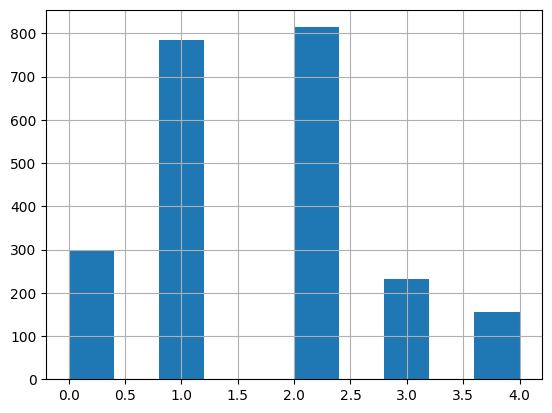

In [33]:
y_train.hist()

<Axes: >

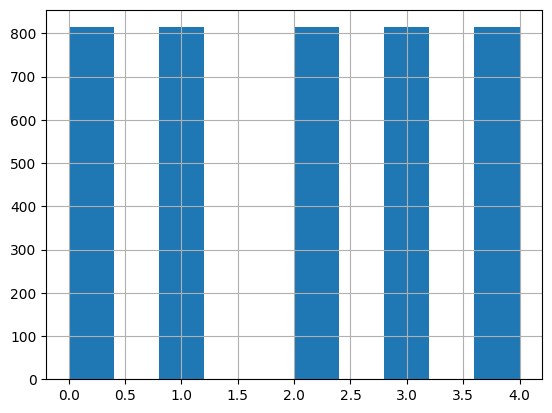

In [34]:
y_train_resampled.hist()

In [35]:
# Normalize pixel values to be between 0 and 1
x_train_resampled = x_train_resampled / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train_resampled)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [36]:
x_train_resampled.shape

(4070, 224, 224, 3)

In [37]:
# Model 1: Convolutional Neural Network (CNN)
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=original_shape))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(64, activation='relu'))
model_cnn.add(layers.Dense(5, activation='softmax'))
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
# Model 2: Transfer Learning with a pre-trained model (VGG16)
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=original_shape)
base_model.trainable = False
model_transfer = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(5, activation='softmax')
])
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
import seaborn as sns

Training CNN...
Epoch 1/25
128/128 [==============================] - 22s 52ms/step - loss: 1.6708 - accuracy: 0.5703 - val_loss: 1.0803 - val_accuracy: 0.6294
Epoch 2/25
128/128 [==============================] - 5s 39ms/step - loss: 0.4163 - accuracy: 0.8698 - val_loss: 1.2231 - val_accuracy: 0.6189
Epoch 3/25
128/128 [==============================] - 5s 39ms/step - loss: 0.1294 - accuracy: 0.9636 - val_loss: 1.4747 - val_accuracy: 0.6678
Epoch 4/25
128/128 [==============================] - 5s 39ms/step - loss: 0.0762 - accuracy: 0.9835 - val_loss: 1.5676 - val_accuracy: 0.6783
Epoch 5/25
128/128 [==============================] - 5s 39ms/step - loss: 0.0633 - accuracy: 0.9877 - val_loss: 1.6301 - val_accuracy: 0.6923
Epoch 6/25
128/128 [==============================] - 5s 39ms/step - loss: 0.0574 - accuracy: 0.9894 - val_loss: 1.5111 - val_accuracy: 0.6783
Epoch 7/25
128/128 [==============================] - 5s 38ms/step - loss: 0.0470 - accuracy: 0.9909 - val_loss: 1.6909 - val

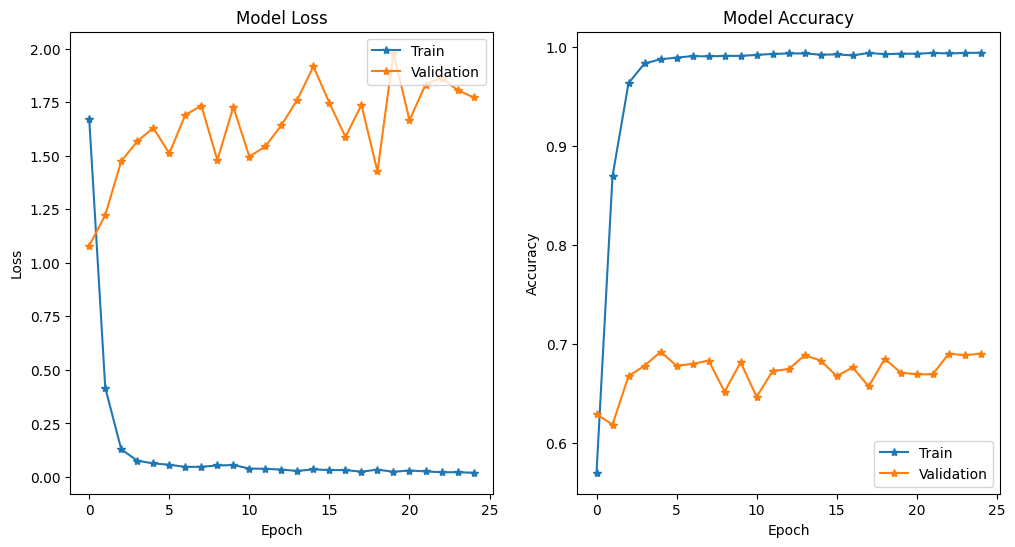

18/18 [==============================] - 0s 13ms/step


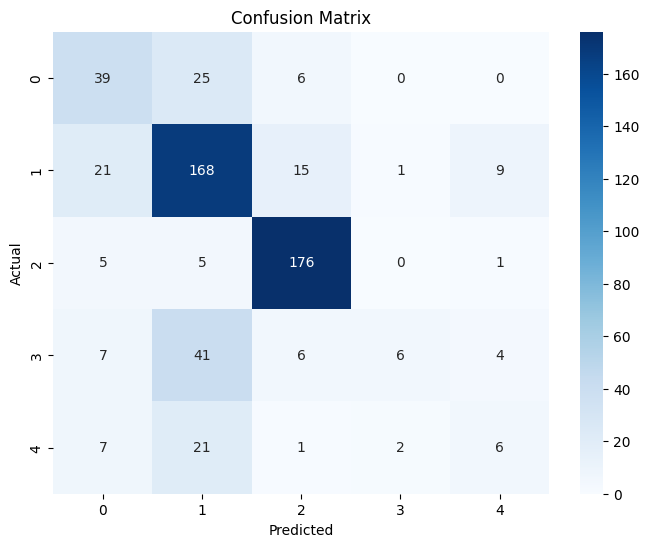



Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.56      0.52        70
           1       0.65      0.79      0.71       214
           2       0.86      0.94      0.90       187
           3       0.67      0.09      0.16        64
           4       0.30      0.16      0.21        37

    accuracy                           0.69       572
   macro avg       0.59      0.51      0.50       572
weighted avg       0.68      0.69      0.66       572

Training Transfer Learning...
Epoch 1/25
128/128 [==============================] - 30s 191ms/step - loss: 1.5292 - accuracy: 0.3270 - val_loss: 1.2721 - val_accuracy: 0.5524
Epoch 2/25
128/128 [==============================] - 18s 139ms/step - loss: 1.3707 - accuracy: 0.3966 - val_loss: 1.1483 - val_accuracy: 0.6031
Epoch 3/25
128/128 [==============================] - 18s 139ms/step - loss: 1.3025 - accuracy: 0.4224 - val_loss: 1.1026 - val_accuracy: 0.5962
Epoch 4/25
128/128 [=

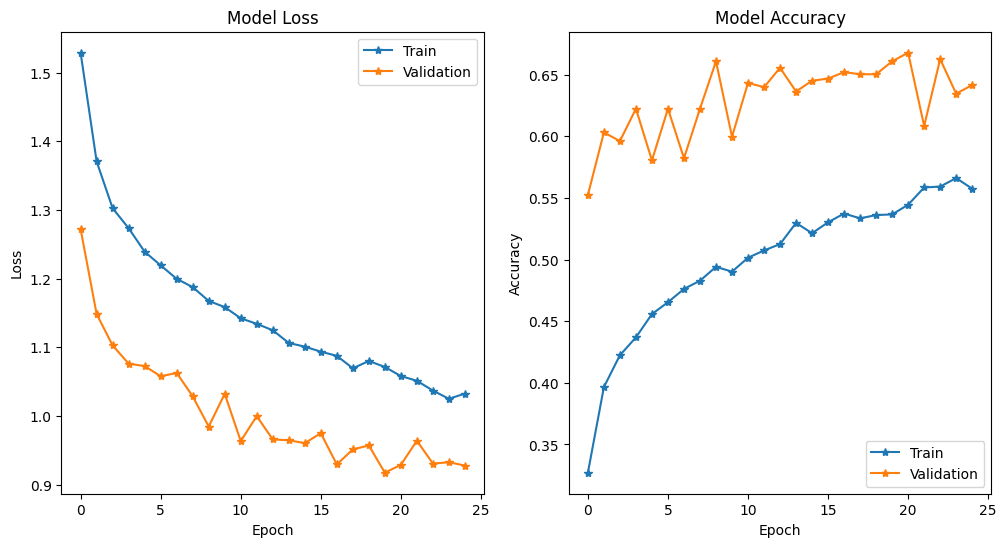

18/18 [==============================] - 2s 120ms/step


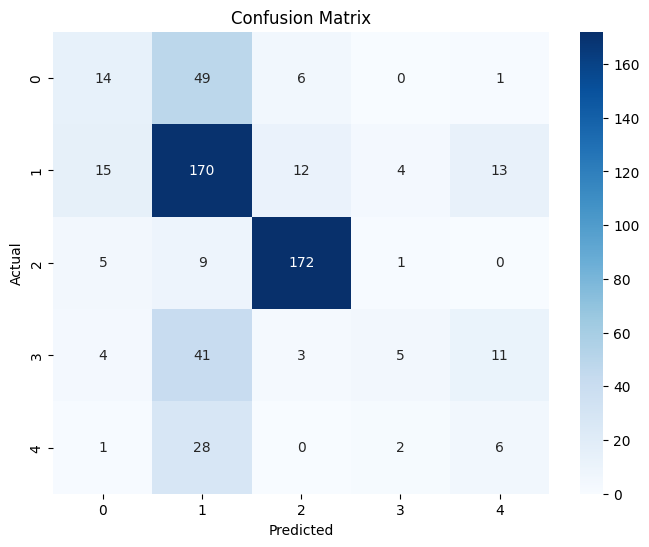



Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.20      0.26        70
           1       0.57      0.79      0.67       214
           2       0.89      0.92      0.91       187
           3       0.42      0.08      0.13        64
           4       0.19      0.16      0.18        37

    accuracy                           0.64       572
   macro avg       0.49      0.43      0.43       572
weighted avg       0.61      0.64      0.60       572



In [41]:
# Train and evaluate each model
models = {
    "CNN": model_cnn,
    "Transfer Learning": model_transfer,
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    history = model.fit(x_train_resampled, y_train_one_hot, epochs=25, validation_data=(x_test, y_test_one_hot))
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], marker='*')
    plt.plot(history.history['val_loss'], marker='*')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    print()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], marker='*')
    plt.plot(history.history['val_accuracy'], marker='*')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')
    print()
    plt.show()
    
    y_pred_probs = model.predict(x_test)

# Convert probabilities to one-hot encoded predictions
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Convert one-hot encoded labels back to categorical labels for the test set
    y_test_labels = np.argmax(y_test_one_hot, axis=1)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test_labels, y_pred)
    class_labels=[0,1,2,3,4]
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print()

    # Generate classification report
    class_report = classification_report(y_test_labels, y_pred)
    print("\nClassification Report:")
    print(class_report)
    

In [42]:
#Model 3 : Unet

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, UpSampling2D, Concatenate, BatchNormalization, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=original_shape)
base_model.trainable = False

# U-Net-like architecture with added layers for classification
x = base_model.output
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

# Classification head
classification_head = GlobalAveragePooling2D()(x)
classification_head = Dense(128, activation='relu')(classification_head)
classification_head = BatchNormalization()(classification_head)
output = Dense(5, activation='softmax')(classification_head)

# Create the model
model_transfer_unet = Model(inputs=base_model.input, outputs=output)

# Compile the model
model_transfer_unet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 [==============================] - 0s 0us/step


In [43]:
#Model 4 VGGnet

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten

# Base model
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=original_shape)
base_model_vgg.trainable = False

# Flatten the output of VGG16
flatten_output_vgg = Flatten()(base_model_vgg.output)

# Classification head
x_vgg = Dense(256, activation='relu')(flatten_output_vgg)
x_vgg = BatchNormalization()(x_vgg)
output_vgg = Dense(5, activation='softmax')(x_vgg)

# Create the model
model_transfer_vgg = Model(inputs=base_model_vgg.input, outputs=output_vgg)

# Compile the model
model_transfer_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Training CNN...
Epoch 1/25
128/128 [==============================] - 18s 90ms/step - loss: 1.1420 - accuracy: 0.5113 - val_loss: 3.1701 - val_accuracy: 0.3969
Epoch 2/25
128/128 [==============================] - 9s 67ms/step - loss: 0.9490 - accuracy: 0.6005 - val_loss: 1.8252 - val_accuracy: 0.6031
Epoch 3/25
128/128 [==============================] - 8s 63ms/step - loss: 0.8122 - accuracy: 0.6759 - val_loss: 1.4587 - val_accuracy: 0.5594
Epoch 4/25
128/128 [==============================] - 8s 64ms/step - loss: 0.6737 - accuracy: 0.7334 - val_loss: 1.3914 - val_accuracy: 0.5769
Epoch 5/25
128/128 [==============================] - 8s 62ms/step - loss: 0.5590 - accuracy: 0.7840 - val_loss: 23.0044 - val_accuracy: 0.0647
Epoch 6/25
128/128 [==============================] - 8s 63ms/step - loss: 0.5319 - accuracy: 0.8022 - val_loss: 1.9651 - val_accuracy: 0.5297
Epoch 7/25
128/128 [==============================] - 8s 63ms/step - loss: 0.4351 - accuracy: 0.8373 - val_loss: 3.6087 - va

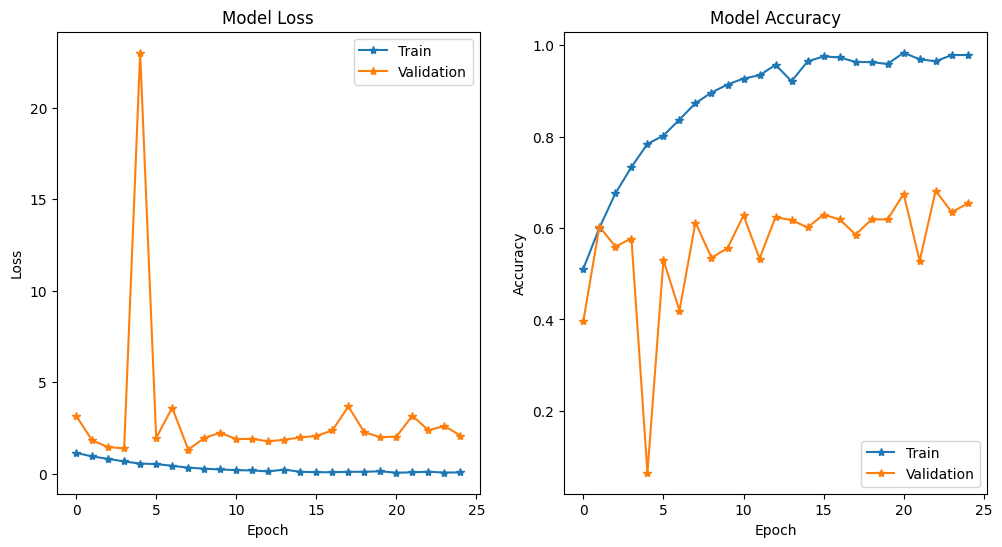

18/18 [==============================] - 2s 49ms/step


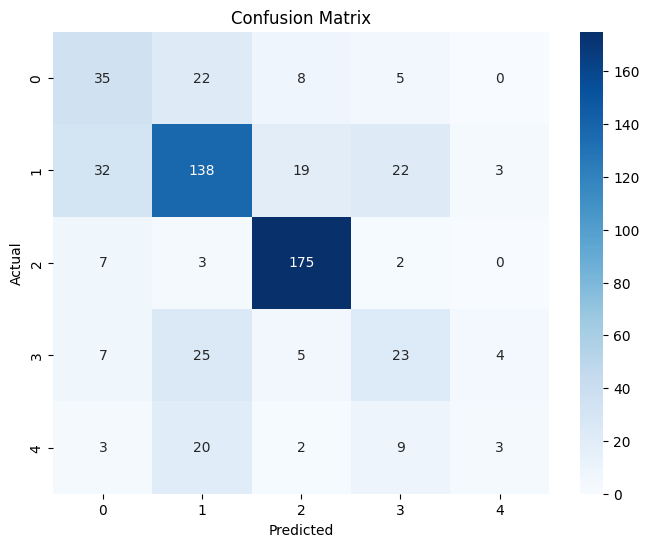



Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.50      0.45        70
           1       0.66      0.64      0.65       214
           2       0.84      0.94      0.88       187
           3       0.38      0.36      0.37        64
           4       0.30      0.08      0.13        37

    accuracy                           0.65       572
   macro avg       0.52      0.50      0.50       572
weighted avg       0.63      0.65      0.64       572

Training Transfer Learning...
Epoch 1/25
128/128 [==============================] - 21s 150ms/step - loss: 0.9595 - accuracy: 0.6558 - val_loss: 1.0145 - val_accuracy: 0.6189
Epoch 2/25
128/128 [==============================] - 18s 144ms/step - loss: 0.3975 - accuracy: 0.8654 - val_loss: 1.1661 - val_accuracy: 0.5909
Epoch 3/25
128/128 [==============================] - 18s 140ms/step - loss: 0.2346 - accuracy: 0.9224 - val_loss: 1.3700 - val_accuracy: 0.5664
Epoch 4/25
128/128 [=

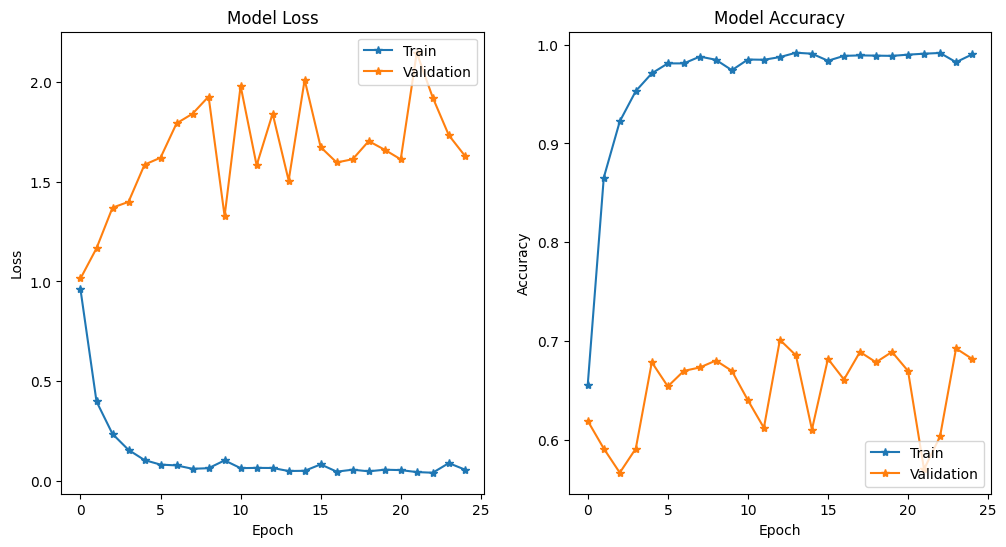

18/18 [==============================] - 2s 121ms/step


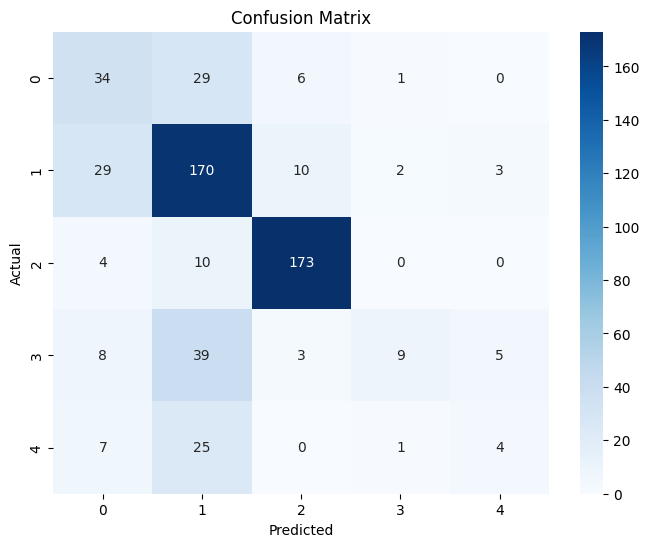



Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.49      0.45        70
           1       0.62      0.79      0.70       214
           2       0.90      0.93      0.91       187
           3       0.69      0.14      0.23        64
           4       0.33      0.11      0.16        37

    accuracy                           0.68       572
   macro avg       0.59      0.49      0.49       572
weighted avg       0.68      0.68      0.65       572



In [44]:
# Train and evaluate each model
models = {
    "CNN": model_transfer_unet,
    "Transfer Learning": model_transfer_vgg,
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    history = model.fit(x_train_resampled, y_train_one_hot, epochs=25, validation_data=(x_test, y_test_one_hot))
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], marker='*')
    plt.plot(history.history['val_loss'], marker='*')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    print()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], marker='*')
    plt.plot(history.history['val_accuracy'], marker='*')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')
    print()
    plt.show()
    
    y_pred_probs = model.predict(x_test)

# Convert probabilities to one-hot encoded predictions
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Convert one-hot encoded labels back to categorical labels for the test set
    y_test_labels = np.argmax(y_test_one_hot, axis=1)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test_labels, y_pred)
    class_labels=[0,1,2,3,4]
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print()

    # Generate classification report
    class_report = classification_report(y_test_labels, y_pred)
    print("\nClassification Report:")
    print(class_report)
    